# General Curve Fitting

# Fitting data numerically to any general model

First, import packages. We will use the `curve_fit()` function in the `scipy.optimize` package to calculate the best-fit parameters for any general mathematical function.

In [2]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting

# The Problem

To acertain long-scale changes in Earth's average temperature over time, scientists plot the **global surface temperature anomaly**. In this joint press release by NASA and NOAA on Jan. 18, 2018, [Long-Term Warming Trend Continued in 2017](https://www.giss.nasa.gov/research/news/20180118/), scientists "concluded that 2017 was the third-warmest year in their record." The [data and methodology](https://data.giss.nasa.gov/gistemp/) are provided to the public.

[According to NOAA](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php), "the term temperature anomaly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value."

The reference for this anomaly data is the average temperature during the period 1951 - 1980. Sometimes the 20th century average global surface temperature is used. Then in this case, a positive anomaly is warmer than the 20th century average. A negative anomaly is cooler than the 20th century average. NOAA points out that the reference period does not "change the shape of the time series or affect the trends within it."

To begin, let's read the data file that is available from a public URL. (Note: if you aren't able to post the data file, you can copy and paste the data into a code cell like we did in the [linear curve fit notebook](https://colab.research.google.com/github/atitus/STLinSTL/blob/master/workshop2/03-curve-fitting/03-linear-fit.ipynb).)

In [4]:
# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/global-surface-temperature.txt', sep='\t')
print(df.head())

   Year  Global Temperature Anomaly (deg C)
0  1880                               -0.19
1  1881                               -0.10
2  1882                               -0.10
3  1883                               -0.19
4  1884                               -0.29


Next, let's plot the data to see what it looks like. We need to use the column names `Year` and `Global Temperature Anomaly (deg C)` for our code below.

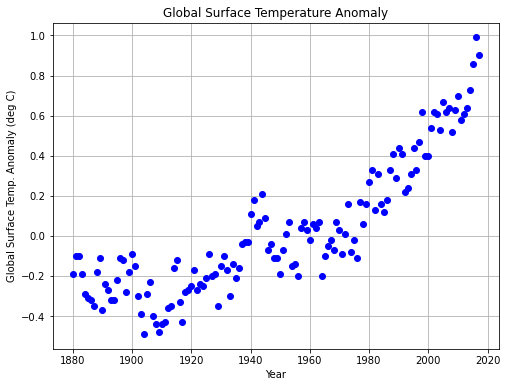

In [7]:
# define arrays for the data
xdata = df['Year']
ydata = df['Global Temperature Anomaly (deg C)']

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Global Surface Temperature Anomaly")
plt.xlabel('Year')
plt.ylabel('Global Surface Temp. Anomaly (deg C)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.show()


Let's do a linear fit of the form:

$$y=mx + b$$

and plot the best-fit function on the same graph as the data.

The best-fit function is y=mx + b where m=0.0072 and b=-14.0288.


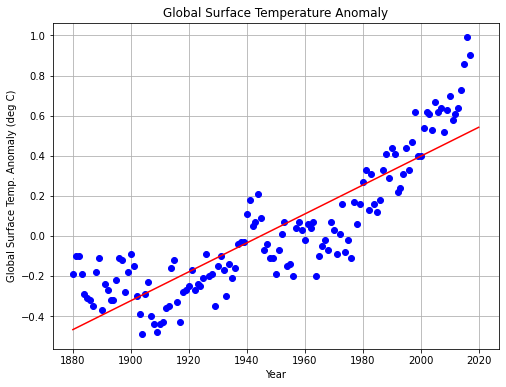

In [9]:
# define arrays for the data
xdata = df['Year']
ydata = df['Global Temperature Anomaly (deg C)']

# define the model function; this function returns y(x) for a given value of x and fit parameters
# the fit parameters are comma-delimited after the variable x
model = lambda x,m,b: m*x + b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters, with one value for each fit parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)
m, b = params
print("The best-fit function is y=mx + b where m={:.4f} and b={:.4f}.".format(m,b))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(1880,2020,100)
yfit = model(xfit, m, b)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Global Surface Temperature Anomaly")
plt.xlabel('Year')
plt.ylabel('Global Surface Temp. Anomaly (deg C)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


# Exercise 1

Copy and paste the program for the linear fit above and change it to do a quadratic fit of the form

$$y = ax^2 + bx + c$$

1. In line 7, change the model function.
2. In line 10, change the number of guesses (or 1s) to match the number of fit parameters.
3. In lines 12 and 13, change the variable names for the fit parameters.


# Exercise 2

1. For Exercise 1,does a quadratic fit work well for all of these years or only during a certain range of years?

2. If we want to predict the global temperature anomaly for the year 2050, how can we improve our empirical model?

3. The program below creates a dataframe with only the rows of data since 1960 and uses this data for a linear curve fit. You may find it useful. Use a quadratic fit for the years since 1960 and predict the temperature anomaly in the year 2050.

The best-fit function is y=mx + b where m=0.0162 and b=-31.8831.


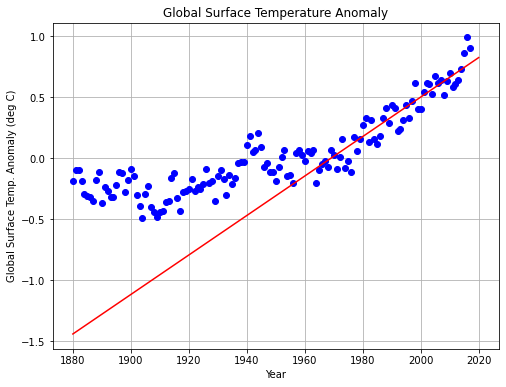

In [10]:
#define arrays for all years and temperatures
year = df['Year']
temp = df['Global Temperature Anomaly (deg C)']

# define arrays for the data used in the curve fit
df2 = df.loc[df['Year'] >= 1960] #create a new dataframe with data after 1960
xdata = df2['Year']
ydata = df2['Global Temperature Anomaly (deg C)']

# define the model function; this function returns y(x) for a given value of x and fit parameters
# the fit parameters are comma-delimited after the variable x
model = lambda x,m,b: m*x + b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters, with one value for each fit parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)
m, b = params
print("The best-fit function is y=mx + b where m={:.4f} and b={:.4f}.".format(m,b))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(1880,2020,100)
yfit = model(xfit, m, b)

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Global Surface Temperature Anomaly")
plt.xlabel('Year')
plt.ylabel('Global Surface Temp. Anomaly (deg C)')
plt.grid(which='both', axis='both')
plt.plot(year, temp, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()


# Exercise 3

Kepler found a relationship between the period of a planet's orbit (in Earth years) and the semi-major axis (kinda like the radius, for a circular orbit) of the planet's orbit (in astronomical units, AU, which is the semi-major axis of Earth's orbit). Data for the 8 planets is in the file [planets.txt](https://github.com/atitus/math-modeling/raw/master/unit-02/02-05-auto-curve-fitting/planets.txt).

1. Plot the period vs.semimajor axis of the planet's orbit.
2. Fit a power law: 
  $$y = Ax^n$$
  and find the best-fit parameters.
3. There are [five dwarf planets](https://en.wikipedia.org/wiki/Dwarf_planet). 
  1. Use your model to **predict** the period of each of the dwarf planets' orbits using the semimajor axis of their orbits.
  2. Compare your prediction to the actual period of each dwarf planet.

# Fitting an exponential decay

## Discharging Capacitor

A capacitor stores electrical potential energy with oppositely charged parallel plates, separated by an insulator. Like a battery, there is a voltage across the capacitor. When the capacitor is connected to a resistor, the voltage decreases as a function of time. (In contrast, a battery maintains a constant voltage for a fairly long time when it is connected to a resistor.)

In this experiment, an initially charged capacitor is connected to a resistor, like a light bulb. At $t=0$, the circuit is connected, and a voltmeter is used to measure the voltage across the capacitor at 10 s intervals.

Data for the voltage as a function of time is in the file `discharging-capacitor.txt`. Let's read and plot the data.

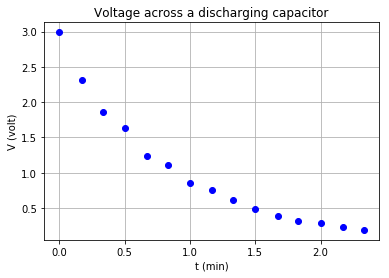

In [7]:
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/discharging-capacitor.txt', sep='\t')

xdata = df['t (min)']
ydata = df['V (volt)']

plt.title('Voltage across a discharging capacitor')
plt.xlabel('t (min)')
plt.ylabel('V (volt)')
plt.grid(which='both', axis='both')
plt.plot(xdata,ydata,'bo')
plt.show()

When we look at this data, we might think "Aha! This looks like exponential decay." But we don't know it's exponential decay unless we do a curve fit. Also, a curve fit can give us the parameters for the best-fit function if indeed it is exponential decay as we expect.

A general exponential function $y(x)$ has the form

$$y=y_0e^{-rx}$$

where $y$ is the dependent variable, x is the independent variable, $r$ is the decay constant, and $y_0$ is the value of $y$ at $x=0$ (the initial value of y).

We will begin by creating a Python function that takes an array of independent values called `x` and constants `y_0` and `r` and calculates the corresponding dependent values `y` using a mathematical function or *model*, $y(x)$ which is in this case an exponential. The rest of the program is similar to what we wrote for a linear curve fit, except we use the fit parameters `y0` and `r`.

The best-fit function is y = y0*exp(-rx) where y0=2.9094 and r=1.2041.


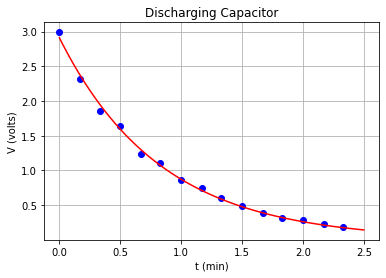

In [11]:
# read the data file
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop2/05-curve-fitting/discharging-capacitor.txt', sep='\t')

# define arrays for the data
xdata = df['t (min)']
ydata = df['V (volt)']

# define the model function; this function returns y(x) for a given value of x and fit parameters
# the fit parameters are comma-delimited after the variable x
model = lambda x,y0,r: y0*np.exp(-r*x)

# find best-fit parameters
initial_guess = [1, 1] #initial guess of y0, r
parameters, stats = curve_fit(model, xdata, ydata, p0=initial_guess)
y0, r = parameters
print("The best-fit function is y = y0*exp(-rx) where y0={:.4f} and r={:.4f}.".format(y0,r))

# create a set of points using the best-fit parameters so we can plot the best-fit function
xfit = np.linspace(0,2.5,100)
yfit = model(xfit, y0, r)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("Discharging Capacitor")
plt.xlabel('t (min)')
plt.ylabel('V (volts)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xfit, yfit, 'r-')
plt.show()
